In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df1=df.copy()
df1=df1.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

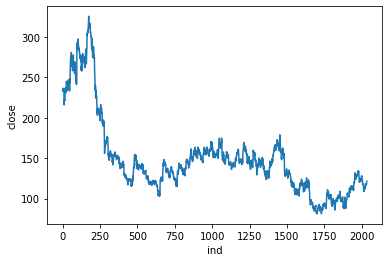

In [4]:
plt.plot(df1)
plt.xlabel("ind")
plt.ylabel("close")
plt.show()

In [5]:
#transform the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1.shape
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [7]:
#splitting the data into training and test data
train_size=int(len(df1)*0.70)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

**DATA PREPROCESSING**

In [8]:
  #time step- for every few sets of training data, o/p is predicted
  #converting array into dataset
  def create_dataset(dataset,time_step=1):
    X_data,Y_data=[],[]
    for i in range(len(dataset)-time_step-1):
      a=dataset[i:(i+time_step),0]
      X_data.append(a)
      Y_data.append(dataset[i+time_step,0])
    return np.array(X_data),np.array(Y_data)

In [9]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [10]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.26041667 0.2563317  0.24652778 ... 0.33415033 0.33986928 0.34681373]
 [0.2563317  0.24652778 0.23611111 ... 0.33986928 0.34681373 0.3500817 ]
 [0.24652778 0.23611111 0.25204248 ... 0.34681373 0.3500817  0.32618464]]


In [11]:
print(X_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [12]:
print(X_test.shape),print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [13]:
#reshape X_train and X_test into 3 dimensions
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1) 

In [14]:
#Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 15s 337ms/step - loss: 0.0559 - val_loss: 0.0095
Epoch 2/100
21/21 [==============================] - 8s 364ms/step - loss: 0.0066 - val_loss: 0.0147
Epoch 3/100
21/21 [==============================] - 6s 266ms/step - loss: 0.0029 - val_loss: 0.0072
Epoch 4/100
21/21 [==============================] - 5s 228ms/step - loss: 0.0025 - val_loss: 0.0066
Epoch 5/100
21/21 [==============================] - 8s 400ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 6/100
21/21 [==============================] - 6s 265ms/step - loss: 0.0021 - val_loss: 0.0059
Epoch 7/100
21/21 [==============================] - 7s 356ms/step - loss: 0.0022 - val_loss: 0.0048
Epoch 8/100
21/21 [==============================] - 5s 248ms/step - loss: 0.0021 - val_loss: 0.0050
Epoch 9/100
21/21 [==============================] - 5s 231ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 10/100
21/21 [==============================] - 8s 401ms/step - loss: 0.0019 - val_l

In [19]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
#transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.8120377438783

In [22]:
math.sqrt(mean_squared_error(y_test,test_predict))

108.02713143543944

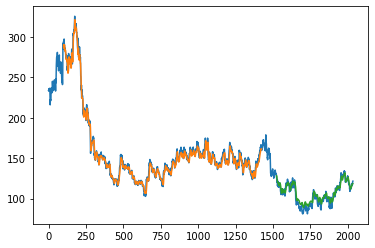

In [23]:
#Plotting
#shift train predictions for plotting
t_step=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[t_step:len(train_predict)+t_step,:]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(t_step*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
 

In [24]:
len(test_data)

611

In [25]:
#create input variables for prediction
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [28]:
#predictions for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

  print(lst_output) 

[0.15805754]
101
[[0.1580575406551361]]
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 

7 day output [[0.15760922]]
[[0.1580575406551361], [0.1598658412694931], [0.16055065393447876], [0.16044434905052185], [0.15990369021892548], [0.15917342901229858], [0.1583874225616455], [0.157609224319458]]
8 day input [0.13071895 0.12867647 0.11846405 0.14644608 0.14808007 0.15910948
 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621
 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458
 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.1247957

13 day output [[0.15413551]]
[[0.1580575406551361], [0.1598658412694931], [0.16055065393447876], [0.16044434905052185], [0.15990369021892548], [0.15917342901229858], [0.1583874225616455], [0.157609224319458], [0.15686805546283722], [0.1561797559261322], [0.15555539727210999], [0.15500350296497345], [0.15452952682971954], [0.15413551032543182]]
14 day input [0.15992647 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621
 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458
 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14

21 day output [[0.15323263]]
[[0.1580575406551361], [0.1598658412694931], [0.16055065393447876], [0.16044434905052185], [0.15990369021892548], [0.15917342901229858], [0.1583874225616455], [0.157609224319458], [0.15686805546283722], [0.1561797559261322], [0.15555539727210999], [0.15500350296497345], [0.15452952682971954], [0.15413551032543182], [0.15381991863250732], [0.15357843041419983], [0.15340417623519897], [0.153288796544075], [0.15322323143482208], [0.15319806337356567], [0.1532040536403656], [0.1532326340675354]]
22 day input [0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19

29 day output [[0.15355252]]
[[0.1580575406551361], [0.1598658412694931], [0.16055065393447876], [0.16044434905052185], [0.15990369021892548], [0.15917342901229858], [0.1583874225616455], [0.157609224319458], [0.15686805546283722], [0.1561797559261322], [0.15555539727210999], [0.15500350296497345], [0.15452952682971954], [0.15413551032543182], [0.15381991863250732], [0.15357843041419983], [0.15340417623519897], [0.153288796544075], [0.15322323143482208], [0.15319806337356567], [0.1532040536403656], [0.1532326340675354], [0.15327590703964233], [0.15332713723182678], [0.15338052809238434], [0.15343143045902252], [0.15347617864608765], [0.15351228415966034], [0.15353800356388092], [0.15355251729488373]]


In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(df1)

2035

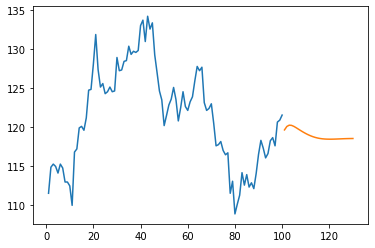

In [31]:
#plot predictions for next 30 days
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))